# Closest pair of points - 2 Dimensional

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

Calculate the distance between two points in a two dimensional grid

In [2]:
def dist(p1, p2):
    return (math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2))

Create 2 equally distributed arrays with ten elements each.
These represent the x and y coordinates of 10 points in the two-dimensional coordinate system.

In [3]:
n = 100 # Number of elements
x = np.random.uniform(-10, 10, n)
y = np.random.uniform(-10, 10, n)
points = np.column_stack((x, y))

Plot all points

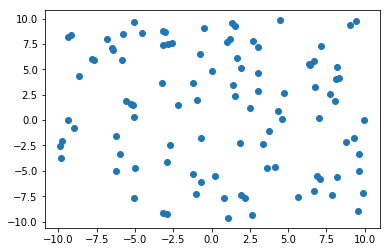

In [4]:
plt.scatter(points[:,0], points[:,1])

## Brute force calculation with an $O(n^2)$ complexity

In [5]:
def dist_matrix(points):
    distance_matrix = np.ndarray((len(points), len(points)))
    min_distance = sys.maxsize
    point1 = None
    point2 = None
    for i in range(len(points)):
        for j in range(len(points)):
            distance = dist(points[i], points[j])
            distance_matrix[i][j] = distance
            if(distance > 0 and distance < min_distance):
                min_distance = distance
                point1 = points[i]
                point2 = points[j]
    
    return distance_matrix, min_distance, point1, point2

In [6]:
start_time = time.time()
distance_matrix, distance, p1, p2 = dist_matrix(points)
end_time = time.time()

In [7]:
print('Min distance: ', distance)
print('Between: ')
print(p1)
print(p2)
print('Time needed: ',  end_time - start_time)

('Min distance: ', 0.09906223898544478)
Between: 
[6.37970143 5.48950856]
[6.45495914 5.42509114]
('Time needed: ', 0.030039072036743164)


In [8]:
print(distance_matrix[1,2])
print(distance_matrix[2,1], 'should be the same as above')
print(distance_matrix[2,2], 'should be zero')

4.4198657518765785
(4.4198657518765785, 'should be the same as above')
(0.0, 'should be zero')


## Divide and Conquer

#### Sort the list in O (n log n) using heapsort

In [9]:
sorted_x = points[points[:,0].argsort(kind='heapsort')]
sorted_y = points[points[:,1].argsort(kind='heapsort')]

In [10]:
def plot_cut(q, r):
    """Plote the point in the graph coloring 
    the to separated groups in blue and read"""
    plt.scatter(q[:,0], q[:,1], c='b', label='q')
    plt.scatter(r[:,0], r[:,1], c='r', label='r')
    plt.legend(loc='upper left')
    plt.show()

In [11]:
def closest_pair(x, y):
    # Base case: Calc the distance of the points if the number of points is less then or equal 3
    if(len(x) <= 3):
        _, min_distance, p1, p2 = dist_matrix(x)
        return min_distance, p1, p2
    else:
        # Divide the quantity S into two equal subquantities S1 and S2, separated by the vertical V. 
        mid = len(x) // 2
        qx = x[:mid]
        rx = x[mid:]
        
        # plot_cut(qx, rx)
        
        midpoint = x[len(x)//2][0]
        qy = []
        ry = []
        for i in y:
            if i[0] <= midpoint:
                qy.append(i)
            else:
                ry.append(i)
        
        # Solve the problem recursively on S1 and S2.
        q_min_distance, q1, q2 = closest_pair(qx, qy)
        r_min_distance, r1, r2 = closest_pair(rx, ry)
          
        
        if q_min_distance < r_min_distance:
            d = q_min_distance
            cp = (q1, q2)
        else:
            d = r_min_distance
            cp = (r1, r2)
            
        v_min_distance, pair = closest_strip_pair(x, y, d, cp)
        
        if v_min_distance < d:
            d = v_min_distance
            cp = pair
            
        return d, cp[0], cp[1]

In [12]:
def closest_strip_pair(x, y, d, closest_pair):
    midpoint = x[len(x) // 2][0]
    
    # Get every point that is inside the strip
    s_y = [i for i in y if midpoint - d <= i[0] <= midpoint + d]
    
    closes_distance = d
    for i in range(len(s_y)):
        for j in range(i + 1, min(i + 7, len(s_y))):
            q = s_y[i]
            r = s_y[j]
            distance = dist(q, r)
            if distance < closes_distance:
                best = distance
                closest_pair = (q, r)
    
    return d, closest_pair

In [13]:
start_time = time.time()
d, p1, p2 = closest_pair(sorted_x, sorted_y)
end_time = time.time()

In [14]:
print('The closest points are: ', p1, ' and ', p2)
print('With a distance of; ', d)
print('Time needed for calculation: ', end_time - start_time)

('The closest points are: ', array([6.37970143, 5.48950856]), ' and ', array([6.45495914, 5.42509114]))
('With a distance of; ', 0.09906223898544478)
('Time needed for calculation: ', 0.004602909088134766)


## Benchmarks

In [90]:
n_begin = 1
n_end = 45

number_of_repeatings = 2
execution_times = []

Do not calculate closest pair for each amount between ```n_begin```and ```n_end```.

In [91]:
point_spacing = lambda n: i**3

In [92]:
def exec_cpp(i):
    x = np.random.uniform(-100, 100, point_spacing(i))
    y = np.random.uniform(-100, 100, point_spacing(i))
    points = np.column_stack((x, y))
    # sort the list
    sorted_x = points[points[:,0].argsort(kind='heapsort')]
    sorted_y = points[points[:,1].argsort(kind='heapsort')]
    
    return closest_pair(sorted_x, sorted_y)
    

In [93]:
import timeit

for i in range(n_begin, n_end):
    time_needed = timeit.timeit(lambda: exec_cpp(i), number=number_of_repeatings)
        
    execution_times.append(time_needed / number_of_repeatings)

#### Add smallest possible number to avoid logarithm of zero

In [94]:
execution_times = [time + sys.float_info.epsilon for time in execution_times]

In [95]:
x_vals = [point_spacing(i) for i in range(n_begin, n_end)]

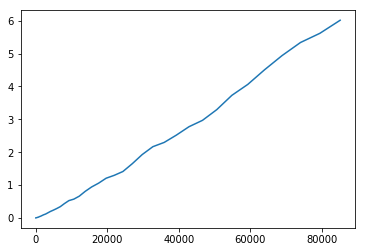

In [96]:
plt.plot(x_vals,execution_times)

#### Benchmark 1
\begin{align*}
(n^2_1, t_1), (n^2_2, t_2),(n^2_3, t_3)...
\end{align*}

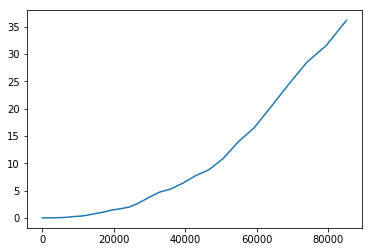

In [97]:
plt.plot(x_vals, [v**2 for v in execution_times])

#### Benchmark 2
\begin{align*}
(n_1(log n_1)^2, t_1), (n_2(log n_2)^2, t_2),(n_3(log n_3)^2, t_3)...
\end{align*}

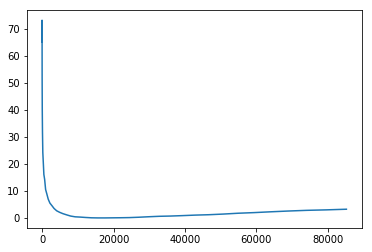

In [98]:
plt.plot(x_vals, [math.log(v)**2 for v in execution_times])

#### Benchmark 3
\begin{align*}
(n_1 log n_1, t_1), (n_2 log n_2, t_2),(n_3 log n_3, t_3)...
\end{align*}

In [ ]:
plt.plot(x_vals, [math.log(v) for v in execution_times])

The result of the third sequence most closely approximates a linear line.
This is gives us a hint that the algorithm has a complexity of $O(n^a)$

## Empirical determination of complexity

#### linear x and y axis: grows linearly

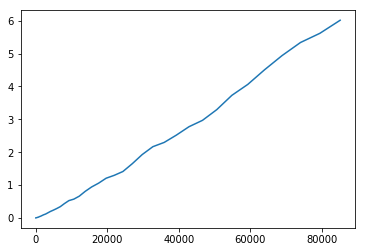

In [99]:
plt.plot(x_vals,execution_times)

#### logarithmic x and linear y axis: grows logarithmically

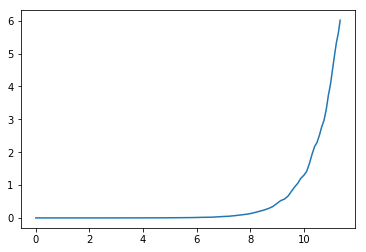

In [100]:
plt.plot(np.log(x_vals),execution_times)

#### linear x and logarithmic y axis: grows exponentially

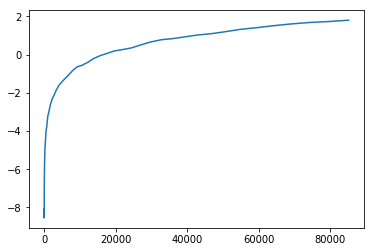

In [101]:
plt.plot(x_vals, np.log(execution_times))

#### logarithmic x and y axis: grows polynomially

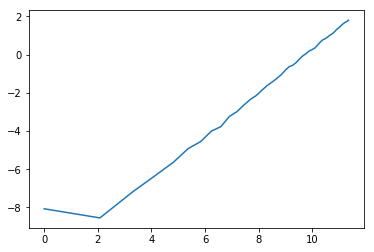

In [102]:
plt.plot(np.log(x_vals), np.log(execution_times))

# Result

From a starting value of $n=3$ we have here an approximately straight line. This gives us information that this is a polynomial complexity.

In [103]:
from scipy.stats import linregress
# cuting the first elements until the linear line begins
epsilon = 3
a = np.log(x_vals)[epsilon:]
b = np.log(execution_times)[epsilon:]

reg = linregress(a, b)

In [104]:
print("The slope is {:.3f}.".format(reg.slope))

The slope is 1.142.


seems to grow polynomially

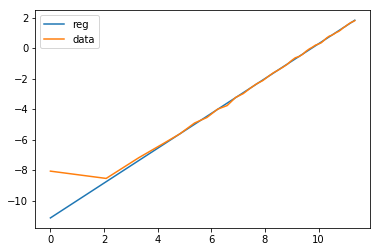

In [105]:
plt.plot(np.log(x_vals), [y * reg.slope + reg.intercept for y in np.log(x_vals)], label="reg")
plt.plot(np.log(x_vals), np.log(execution_times), label="data")
plt.legend(loc='upper left')